First 5 rows of the dataset:
   survey_code  age  gender      height     weight        bmi  bmi_estimated  \
0            1   56    Male  173.416872  56.886640  18.915925      18.915925   
1            2   69  Female  163.207380  97.799859  36.716278      36.716278   
2            3   46    Male  177.281966  80.687562  25.673050      25.673050   
3            4   32  Female  172.101255  63.142868  21.318480      21.318480   
4            5   60  Female  163.608816  40.000000  14.943302      14.943302   

   bmi_scaled  bmi_corrected  waist_size  ...  sunlight_exposure  \
0   56.747776      18.989117   72.165130  ...               High   
1  110.148833      36.511417   85.598889  ...               High   
2   77.019151      25.587429   90.295030  ...               High   
3   63.955440      21.177109  100.504211  ...               High   
4   44.829907      14.844299   69.021150  ...               High   

   meals_per_day  caffeine_intake  family_history  pet_owner  \
0              5 

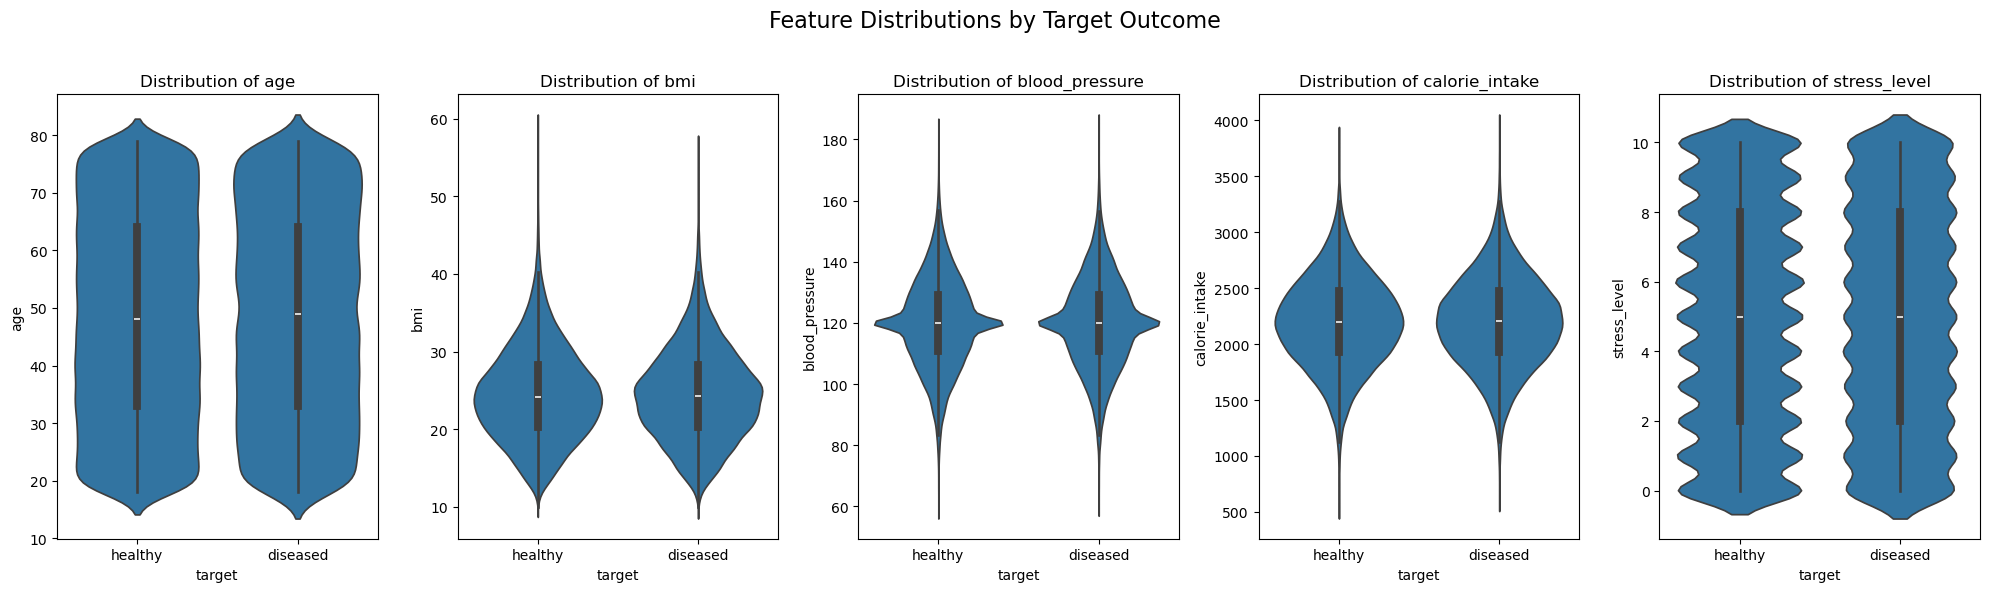


Generating PCA scatter plot...


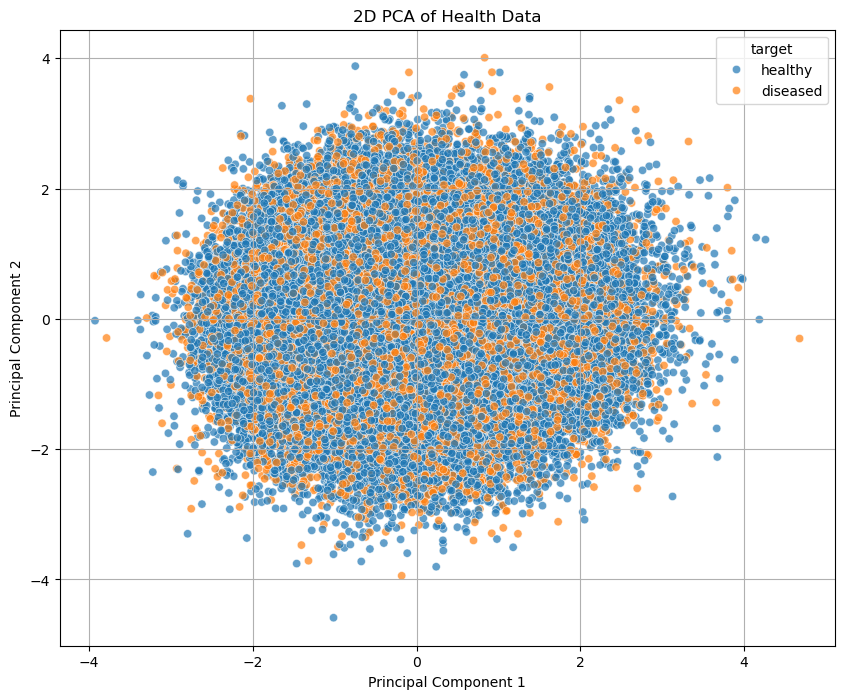

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the file path to your dataset
file_path = r"C:\Users\monik\health_lifestyle_classification.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# --- Initial Data Inspection ---
print("First 5 rows of the dataset:")
print(df.head())

print("\nNull value counts before cleaning:")
print(df.isnull().sum())


# --- Data Cleaning and Preparation ---

# Select the columns needed for analysis
analysis_columns = ['age', 'bmi', 'blood_pressure', 'calorie_intake', 'stress_level', 'target']
analysis_df = df[analysis_columns].copy()

# Separate features and target
X_features = analysis_df.drop('target', axis=1)
Y_target = analysis_df['target']

# Identify numerical columns for imputation and scaling
numerical_cols = X_features.select_dtypes(include=np.number).columns.tolist()

# Handle Missing Values using Imputation
imputer = SimpleImputer(strategy='mean')
X_features[numerical_cols] = imputer.fit_transform(X_features[numerical_cols])

# Scale the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)


# --- Advanced Data Visualization ---

# 1. Violin Plots to compare distributions
print("\nGenerating violin plots...")
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 6))
for i, col in enumerate(numerical_cols):
    sns.violinplot(x=Y_target, y=X_features[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
fig.suptitle('Feature Distributions by Target Outcome', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 2. PCA Scatter Plot to visualize class separation
print("\nGenerating PCA scatter plot...")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = Y_target.values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', data=pca_df, alpha=0.7)
plt.title('2D PCA of Health Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()